<a href="https://colab.research.google.com/github/augustolnb/IA-projects/blob/main/first_project%5Bhouse_value%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
#import warnings

# área construida [feature]
x = np.array([40, 45, 50, 55, 60, 70, 80, 86, 90, 100, 110, 111, 120, 132, 140, 149, 160, 171, 180, 191]).reshape(-1,1)
# valor do mercado das casas [variável]
y = np.array([51000, 62000, 70100, 75245, 82200, 91200, 101000, 110200, 120000, 130000, 150000, 170000, 180000, 190000, 200000, 205000, 210000, 220000, 235000, 250000]).reshape(-1, 1)


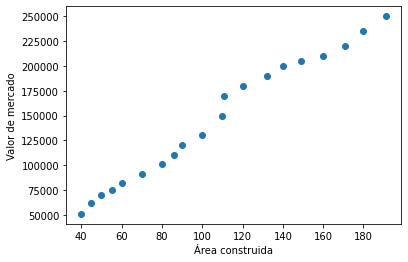

In [10]:
# Visualizando os dados iniciais

plt.scatter(x,y)
plt.xlabel("Área construida")
plt.ylabel("Valor de mercado")
plt.show()

In [11]:
# Pré processamento dos dados

from sklearn.preprocessing import StandardScaler

# verificação de média e desvio padrão antes da normalização
print("Média de X: {:.1f}\nDesvio padrão de X: {:.1f}".format(np.mean(x), np.std(x)))

# fazendo a normalização dos dados
ss = StandardScaler()
x = ss.fit_transform(x)
y = ss.fit_transform(y)
# Fórmula usada na implementação do método fit_transform()
#
# x = x - (x.mean())
#    ----------------
#        x.std()

# verificação de média e desvio padrão pós normalização
print("Média de X: {:.1f}\nDesvio padrão de X: {:.1f}".format(np.mean(x), np.std(x)))



Média de X: 107.0
Desvio padrão de X: 46.0
Média de X: 0.0
Desvio padrão de X: 1.0


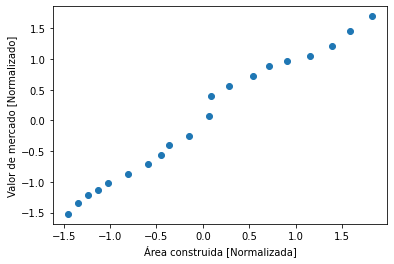

In [12]:
# Visualizando os dados normalizados

plt.scatter(x,y)
plt.xlabel("Área construida [Normalizada]")
plt.ylabel("Valor de mercado [Normalizado]")
plt.show()

In [13]:
# Separando os conjuntos de dados - treinamento e teste

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.3, random_state=25)

In [22]:
# Definindo o modelo da rede

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential([
    Dense(units=1, input_shape=(1,), activation='relu')
    ])

model.compile(optimizer=Adam(learning_rate=0.07), loss='mean_squared_error', )
model.fit(x=x_treino, y=y_treino, epochs=50, validation_data=(x_teste, y_teste))

Epoch 1/50
1/1 [==============================] - 1s 546ms/step - loss: 0.6698 - val_loss: 0.3936
Epoch 2/50
1/1 [==============================] - 0s 41ms/step - loss: 0.6139 - val_loss: 0.3588
Epoch 3/50
1/1 [==============================] - 0s 45ms/step - loss: 0.5787 - val_loss: 0.3423
Epoch 4/50
1/1 [==============================] - 0s 44ms/step - loss: 0.5629 - val_loss: 0.3406
Epoch 5/50
1/1 [==============================] - 0s 57ms/step - loss: 0.5621 - val_loss: 0.3475
Epoch 6/50
1/1 [==============================] - 0s 45ms/step - loss: 0.5701 - val_loss: 0.3559
Epoch 7/50
1/1 [==============================] - 0s 41ms/step - loss: 0.5795 - val_loss: 0.3602
Epoch 8/50
1/1 [==============================] - 0s 42ms/step - loss: 0.5845 - val_loss: 0.3598
Epoch 9/50
1/1 [==============================] - 0s 39ms/step - loss: 0.5842 - val_loss: 0.3556
Epoch 10/50
1/1 [==============================] - 0s 40ms/step - loss: 0.5797 - val_loss: 0.3498
Epoch 11/50
1/1 [===========

1/1 [==============================] - 0s 79ms/step


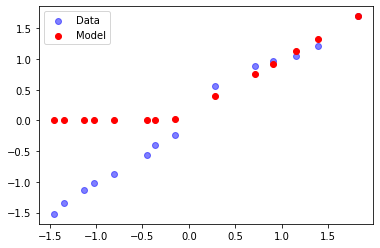

In [23]:
# visualiza predições

def checa_predicoes(model, x, y):
    y_pred = model.predict(x)
    plt.scatter(x, y, c='b', alpha=0.5, label="Data")
    plt.scatter(x, y_pred, c='r', label="Model")
    plt.legend(loc=0)
    plt.show()
    
checa_predicoes(model, x_treino, y_treino)